   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


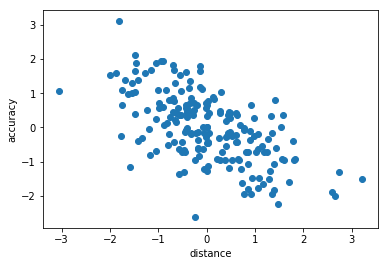

In [38]:
import pandas as pd
import matplotlib.pylab as plt

pga = pd.read_csv("C:/Users/86714/Desktop/DEEP LEARNING/psg.csv",encoding="utf-8",header=None,names=['distance','accuracy'])
#归一化
pga.distance = (pga.distance - pga.distance.mean())/pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean())/pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance,pga.accuracy)
plt.xlabel('distance')
plt.ylabel('accuracy')
plt.show()


一元线性回归：sklearn的linearregression

theta1值为 [-0.60759882]


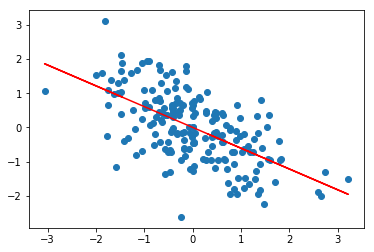

In [44]:
from sklearn.linear_model import LinearRegression
import numpy as np

#增加一个新的维度
pga.distance[:, np.newaxis]

lm = LinearRegression()
X = pga.distance[:, np.newaxis]
y = pga.accuracy
lm.fit(X, y)
#theta值在coef_中
print("theta1值为",lm.coef_)

y2 = lm.predict(X)

plt.scatter(pga.distance[:, np.newaxis], pga.accuracy)
plt.plot(X, y2, color='red')


没有使用梯度下降来求解代价函数cost

In [45]:
def cost(theta0, theta1, x, y):
    J = 0
    m = len(x)
    for i in range(m):
        h = theta1*x[i] + theta0
        J += (h-y[i])**2
    J /= (2*m)
    return J

theta0与theta1求导更新函数：

In [67]:
def partial_cost_theta1(theta0, theta1, x, y):
    h = theta0 + theta1*x    
    diff = (h - y)*x
    partial = diff.sum()/(x.shape[0])
    return partial

def partial_cost_theta0(theta0, theta1, x, y):
    h = theta0 + theta1*x    
    diff = (h - y)
    partial = diff.sum()/(x.shape[0])
    return partial

主函数：

theta0 =  1.4077402526252135e-14
theta1 =  -0.6046983166379609


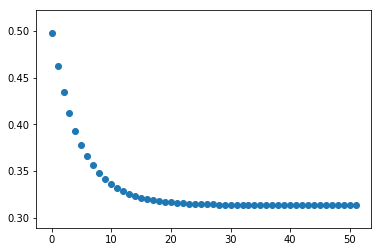

In [73]:
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    #最大迭代次数
    max_epochs = 1000
    conter = 0
    #当前代价函数值
    c = cost(theta0,theta1,x ,y)
    costs = [c]
    
    #设置收敛的阈值
    convergence = 0.000001
    cprev = c + 10
    
    
    
    while (np.abs(cprev - c) > convergence) and (conter < max_epochs):
        #记录下当前c值用来比较
        cprev = c
        
        update0 = alpha*partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha*partial_cost_theta1(theta0, theta1, x, y)
        
        theta0 -= update0
        theta1 -= update1
        
        c = cost(theta0, theta1, pga.distance, pga.accuracy)
        
        costs.append(c)
        conter += 1
    
    return {'theta0':theta0,'theta1':theta1, "costs":costs}
        
descend = gradient_descent(pga.distance, pga.accuracy)
print('theta0 = ', descend['theta0'])
print('theta1 = ', descend['theta1'])
#画图做出cost变化
plt.scatter(range(len(descend["costs"])),descend["costs"])
plt.show()
    
    

https://douzujun.github.io/page/%E6%95%B0%E6%8D%AE%E6%8C%96%E6%8E%98%E7%AC%94%E8%AE%B0/5-%E5%9B%9E%E5%BD%92%E7%AE%97%E6%B3%95/Code/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%E4%B8%8E%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D_GradientDescent.html

https://www.yuque.com/zhaoluyang/igcyav/mi1wbu

theta0 =  1.352979769956799e-14
theta1 =  -0.5976256382464714


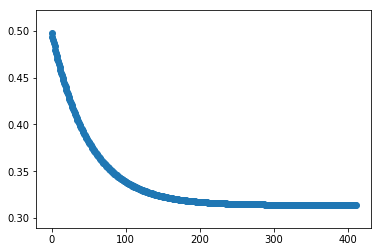

In [74]:
#改变前进步长alpha
descend = gradient_descent(pga.distance, pga.accuracy,alpha = 0.01)
print('theta0 = ', descend['theta0'])
print('theta1 = ', descend['theta1'])
#画图做出cost变化
plt.scatter(range(len(descend["costs"])),descend["costs"])
plt.show()